MAE: 2.844439627992123
MSE: 15.120280638534929
RMSE: 3.888480505098994
R2 Score: 0.8255366297875837


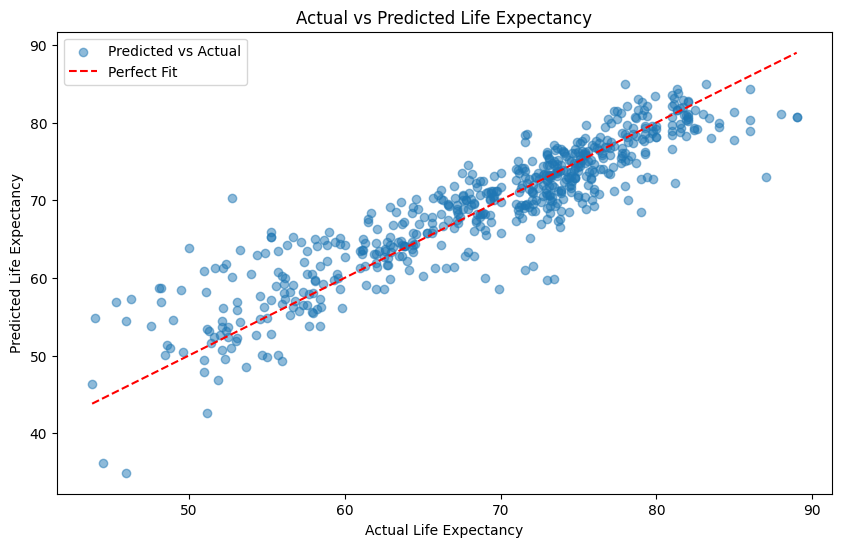

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

file_path = "Regression Data.csv" 
df = pd.read_csv(file_path)

df.columns = df.columns.str.strip()

df_cleaned = df.drop(columns=["Population"], errors='ignore')

num_imputer = SimpleImputer(strategy="median")
df_cleaned.iloc[:, 3:] = num_imputer.fit_transform(df_cleaned.iloc[:, 3:])

# Encode categorical variables
label_encoder = LabelEncoder()
df_cleaned["Country"] = label_encoder.fit_transform(df_cleaned["Country"])
df_cleaned["Status"] = label_encoder.fit_transform(df_cleaned["Status"])

# Define target variable and features
X = df_cleaned.drop(columns=["Life expectancy"], errors='ignore')
y = df_cleaned["Life expectancy"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print errors
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label='Perfect Fit')
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Actual vs Predicted Life Expectancy")
plt.legend()
plt.show()

